In [5]:
import numpy as np
import matplotlib.pyplot as plt
from core.ode import define_vqs_ode, define_schrodinger_ode
from core.integrators import euler, rk4
from core.variational_simulation import trial_state_ising, R_k_matrix
from core.utils import infidelity
from core.schrodinger import state_evoluted

# 2 qubits

In [6]:
J = 1/2
B = 1/2
fs = [[-1j*J], [-1j*B, -1j*B]]
params_init = np.array([1.0, 1.0])
ops = [["ZZ"], ["XI", "IX"]]

hs = [-2.0*J, -B, -B] # Hamiltonian non-dependent on time
# hs = lambda t: [-2*J*np.cos(t), -B*np.cos(t), -B*np.sin(t)] # Hamiltonian parameters dependent on time # FAKE DATA FTW

opsH = ["ZZ", "XI", "IX"]

state = np.ones(4, dtype=complex)/2

# Time discretization
dt = 0.01
Nt = 10

In [7]:
Hz = R_k_matrix(-1.0, fs[0], ops[0])
Hx = R_k_matrix(-1.0, fs[1], ops[1])
state_vqe = Hz @ Hx @ state
state_vqe = state_vqe/np.linalg.norm(state_vqe)

In [8]:
ode = define_vqs_ode(ops, opsH, fs, hs, state_vqe, analytic=True)    # Define the diff. equation RHS as a function of the parameters
params_evolved = euler(ode, params_init, dt, Nt)              # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt)                # Integrate in time!

Text(0.5, 1.0, 'Analytic')

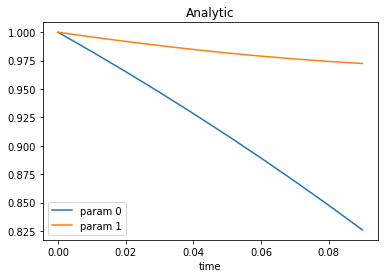

In [9]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Analytic")

In [10]:
# Through the circuit

ode = define_vqs_ode(ops, opsH, fs, hs, state_vqe)    # Define the diff. equation RHS as a function of the parameters
params_evolved = euler(ode, params_init, dt, Nt)  # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt)    # Integrate in time!

Text(0.5, 1.0, 'Circuit')

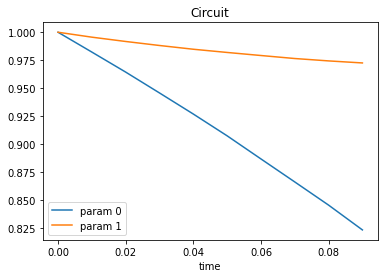

In [11]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Circuit")

In [30]:
# Solve the schrodinger equation directly
schrodinger = define_schrodinger_ode(opsH, hs)
state_evolved = euler(schrodinger, state, dt, Nt)
normalize_state_evolved = state_evolved/np.linalg.norm(state_evolved, axis=1, keepdims=True)
trial_state = trial_state_ising(params_evolved,state_vqe,fs,ops,Nt)
infidelity(normalize_state_evolved, trial_state)

[2.220446049250313e-16,
 0.00010168324547854546,
 0.00040777996771412806,
 0.0009201614063946151,
 0.001640184709508996,
 0.0025696571272104674,
 0.0037111591821924472,
 0.005064435802550671,
 0.006630425191035627,
 0.00841361590381895]

In [31]:
infidelity(state_evoluted(state, opsH, hs, dt, Nt, img=True).T[0:-1, :], trial_state[1:, :])

[1.461774565614249e-06,
 0.0001064693894599067,
 0.0004169785285060845,
 0.0009344869223941732,
 0.0016608919032813363,
 0.0025987922378766237,
 0.003748220911682809,
 0.005110267128737411,
 0.006689275242473203]

# 3 qubits

In [ ]:
n_qubits = 3
J = 1/2
B = 1/2
fs = [[-1j*J, -1j*J, -1j*J], [-1j*B, -1j*B, -1j*B]]
params_init = np.array([0.1, 0.1])
ops = [["ZZI", "IZZ", "ZIZ"], ["XII", "IXI", "IIX"]]
hs = [-J, -J, -J, -B, -B, -B]
opsH = ["ZZI", "IZZ", "ZIZ", "XII", "IXI", "IIX"]
vector = np.array([0.35355339,  0.35355339, 0.35355339, -0.35355339,
                   0.35355339, -0.35355339, -0.35355339, -0.35355339]) + 1j*0
vector = vector/np.linalg.norm(vector)
# Time discretization
dt = 0.01
Nt = 10

In [ ]:
ode = define_vqs_ode(ops, opsH, fs, hs, analytic=True, state = vector)    # Define the diff. equation RHS as a function of the parameters
params_evolved = euler(ode, params_init, dt, Nt)              # Integrate in time!
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Analytic")

In [ ]:
ode = define_vqs_ode(ops, opsH, fs, hs, state = vector)    # Define the diff. equation RHS as a function of the parameters
params_evolved = euler(ode, params_init, dt, Nt)
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Circuit")

In [ ]:
# Solve the schrodinger equation directly
schrodinger = define_schrodinger_ode(opsH, hs)

state_evolved = euler(schrodinger, vector, dt, Nt)
normalize_state_evolved=  state_evolved/np.linalg.norm(state_evolved)
trial= trial_state_ising(params_evolved,vector,fs,ops, Nt)
infidelity(normalize_state_evolved, trial)

In [ ]:
# state_evolved = (1)
trial= trial_state_ising(params_evolved,vector,fs,ops, Nt)
infidelity(state_evolved[1:Nt,:], trial[0:Nt-1,:])